# Análisis de datos sobre las mediciones realizadas en el laboratorio

## Experiencia 1: 
- `Vo = 50V`
- `Vf = 2V`
- `T = [202, 207]`
- `Primer registro: 30`

In [1]:
import pandas as pd
import numpy as np
import scipy.signal
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Valores de la experiencia
V0 = 50
Vf = 2
T = (202 + 207) / 2
PRIMER_REGISTRO = 30

Va = V0/101
C = 0.0022
R = 10000

In [2]:
def va(t):
    '''
    Devuelve el valor de Va en función del tiempo transcurrido de la carga del capacitor.
    '''
    return V0*(1-(100/101)*math.e**(-t/(R*C)))

In [3]:
def load_data(path):
    '''
    Carga y preprocesa el set de datos de la experiencia.
    '''
    data = pd.read_csv(path, sep='\t')
    
    # Borrar registros previos a t0
    data = data[PRIMER_REGISTRO - 1:].drop(['No', 'Unit', 'AUTO', 'DC/AC'], axis=1).reset_index(drop=True)
    
    # Normalizar el tiempo
    data['Time'] = pd.to_datetime(data['Time'])
    segs_por_medicion = (data.iloc[-1] - data.iloc[0])[0].total_seconds() / len(data)
    data['t'] = data.index * segs_por_medicion
    
    # Calcular Va en función de t
    data['Va'] = va(data['t'])
    
    # Eliminar columnas innecesarias, reordenar y renombrar columnas.
    data = data.drop(['Time'], axis=1).loc[:, ('t','Va', 'Value')].rename({'Value': 'I'}, axis=1)
    
    return data

In [4]:
data = load_data('mediciones/Exp1.xls')
data.head(1)

,t,Va,I
0,0.0,0.49505,1.5


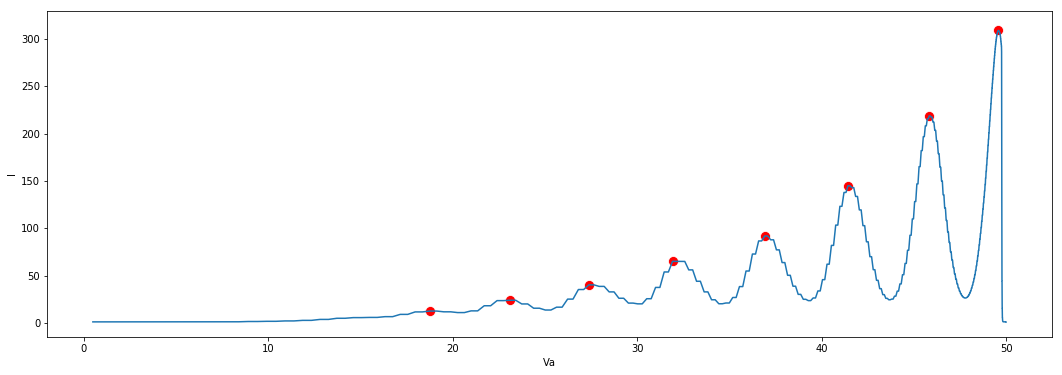

In [5]:
def find_peaks(data):
    return scipy.signal.find_peaks(data.loc[:,'I'], prominence=1)[0]

def graph_peaks(data, peaks):
    plt.subplots(figsize=(18,6))
    sns.lineplot(data['Va'], data['I']);
    sns.scatterplot(data.loc[peaks, 'Va'], data.loc[peaks, 'I'], color='red', s=100);

peaks = find_peaks(data)
graph_peaks(data, peaks)

m: 4.484020780067305, Vc: 14.181317884582384


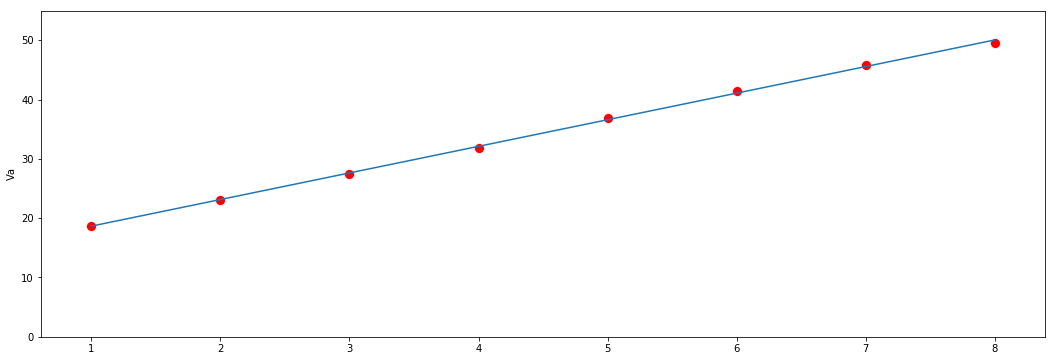

In [6]:
def find_least_squares(data, peaks):
    # Ajustar por cuadrados mínimos resolviendo Ax=B
    A = np.array([[x+1, 1] for x in range(len(peaks))])
    B = np.array(data.loc[peaks, 'Va'])
    return np.linalg.lstsq(A, B, rcond=None)[0]

def graph_least_squares(data, peaks, m, b):
    # Graficar la recta y los picos
    xx = np.array([i+1 for i in range(len(peaks))])
    yy = m * xx + b

    fig, ax = plt.subplots(figsize=(18,6))
    plt.ylim(0, V0 + 0.1*V0)
    plt.xticks(xx)
    sns.lineplot(xx, yy, ax=ax)
    sns.scatterplot([i+1 for i in range(len(peaks))], data.loc[peaks, 'Va'], color='red', s=100, ax=ax);

m, b = find_least_squares(data, peaks)
graph_least_squares(data, peaks, m, b)
print(f"m: {m}, Vc: {b}")

## Experiencia 2: 
- `Vo = 50V`
- `Vf = 1V`
- `T = [203, 208]`
- `Primer registro: 20`

In [7]:
V0 = 50
Vf = 1
T = (203 + 208) / 2
PRIMER_REGISTRO = 20

Va = V0/101
C = 0.0022
R = 10000

In [8]:
data = load_data('mediciones/Exp2.xls')

In [9]:
data.head(1)

,t,Va,I
0,0.0,0.49505,1.5


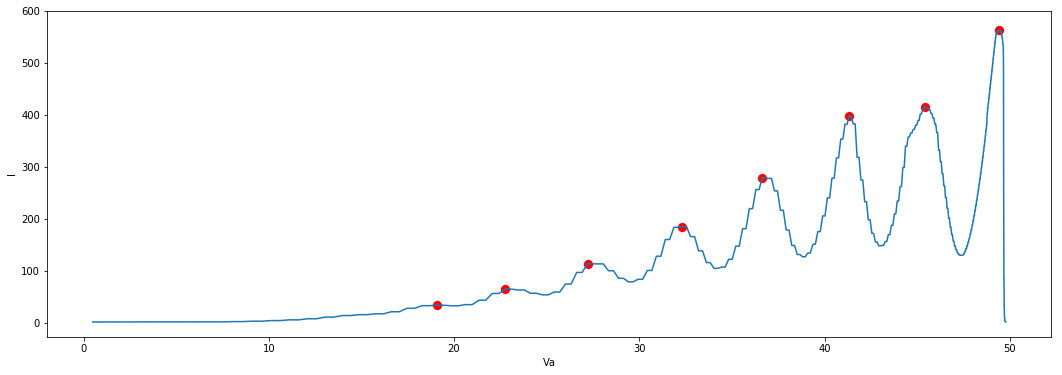

In [10]:
peaks = find_peaks(data)
graph_peaks(data, peaks)

m: 4.432491717754559, Vc: 14.324115718466757


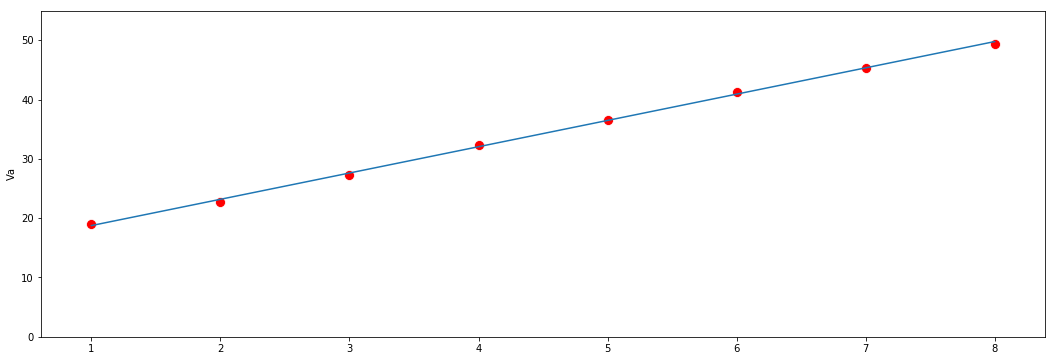

In [11]:
m, b = find_least_squares(data, peaks)
graph_least_squares(data, peaks, m, b)
print(f"m: {m}, Vc: {b}")

## Experiencia 3: 
- `Vo = 30V`
- `Vf = 2V`
- `T = [202, 208]`
- `Primer registro: 15`

In [12]:
V0 = 30
Vf = 2
T = (202 + 208) / 2
PRIMER_REGISTRO = 20

Va = V0/101
C = 0.0022
R = 10000

In [13]:
data = load_data('mediciones/Exp3.xls')
data.head(1)

,t,Va,I
0,0.0,0.29703,2.6


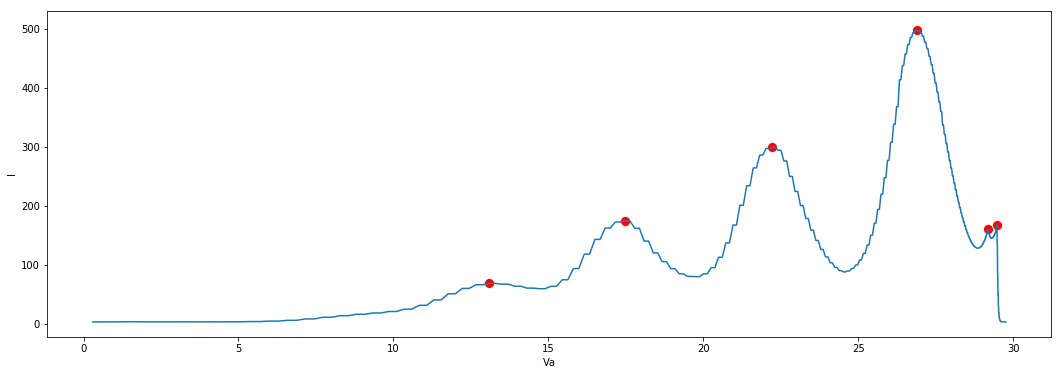

In [14]:
peaks = find_peaks(data)
graph_peaks(data, peaks)

**Nota**: Se descartan los últimos dos picos ya que provienen de errores de medición.

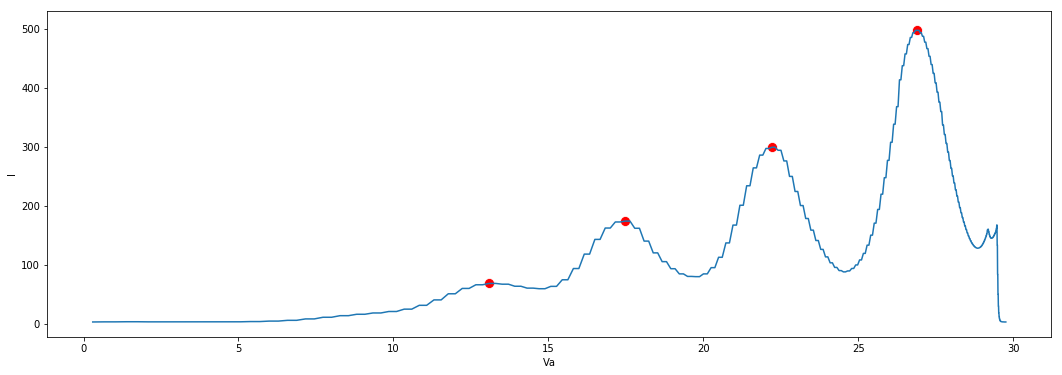

In [15]:
peaks = peaks[:-2]
graph_peaks(data, peaks)

m: 4.611219215745662, Vc: 8.38566263555619


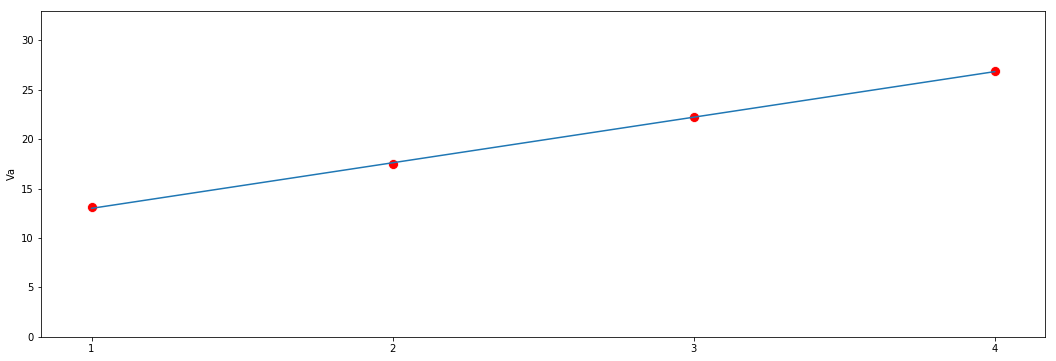

In [16]:
m, b = find_least_squares(data, peaks)
graph_least_squares(data, peaks, m, b)
print(f"m: {m}, Vc: {b}")

## Experiencia 4 (ionización): 
- `Vo = 50V`
- `Vf = 2V`
- `T = [162, 169]`
- `Primer registro: 8`

In [17]:
V0 = 50
Vf = 2
T = (162 + 169) / 2
PRIMER_REGISTRO = 8

Va = V0/101
C = 0.0022
R = 10000

In [18]:
data = load_data('mediciones/Exp4.xls')
data.head(1)

,t,Va,I
0,0.0,0.49505,0.6


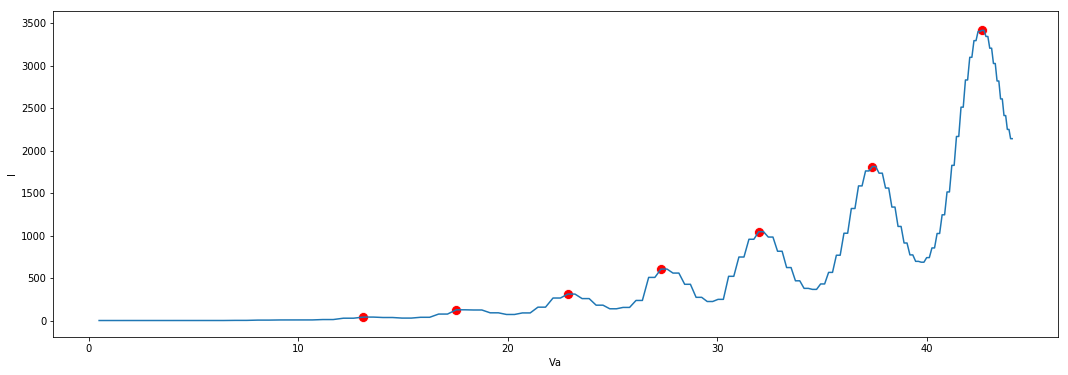

In [19]:
peaks = find_peaks(data)
graph_peaks(data, peaks)

m: 4.907905114949135, Vc: 7.92019639559798


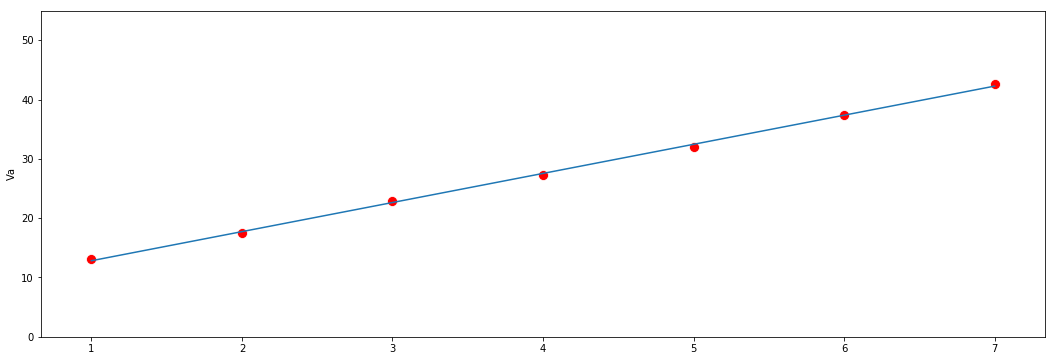

In [20]:
m, b = find_least_squares(data, peaks)
graph_least_squares(data, peaks, m, b)
print(f"m: {m}, Vc: {b}")